# 데이터 둘러보기

In [48]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

from xgboost import XGBClassifier

In [50]:
train = pd.read_csv('ch08_안전운전예측//train.csv', index_col='id')
test = pd.read_csv('ch08_안전운전예측/test.csv', index_col='id')


In [11]:
train.shape

(595212, 58)

In [12]:
test.shape

(892816, 57)

In [13]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

<Axes: >

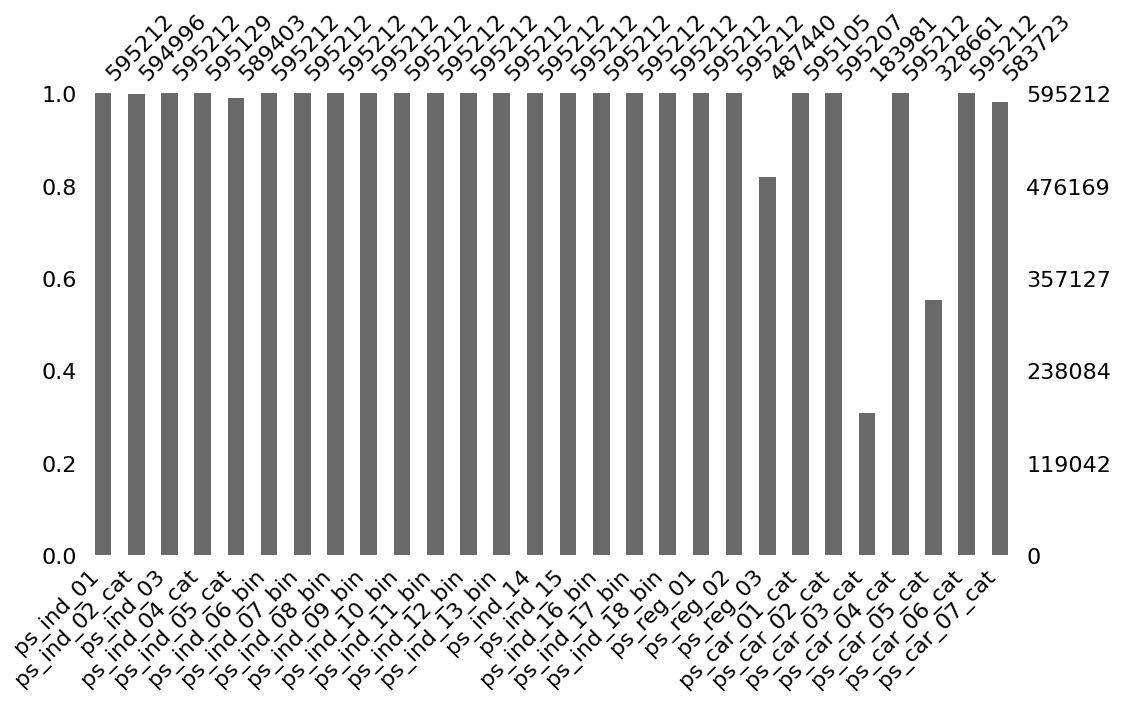

In [20]:
import numpy as np
import missingno as msno

# -1을 np.Nan로 변환
train_copy = train.copy().replace(-1, np.nan)

# 결측값 시각화(처음 28개만)
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(12, 6))

# 데이터 시각화

In [15]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [36]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target',axis=1)

In [37]:
all_features = all_data.columns
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [39]:
drop_features =['ps_ind_14', 'ps_ind_10_bin','ps_ind_11_bin',
                'ps_ind_12_bin','ps_ind_13_bin','ps_car_14']

In [42]:
remaining_features = [
    f for f in all_features
    if 'cat' not in f
    and 'calc' not in f
    and f not in drop_features
]


In [44]:
from scipy import sparse

all_data_sprs = sparse.hstack(
    [
        sparse.csr_matrix(all_data[remaining_features]),
        encoded_cat_matrix
    ],
    format='csr'   # ← 고쳐야 하는 부분
)


In [ ]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num]

# 베이스라인 모델

In [21]:
import pandas as pd

In [22]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

In [23]:
all_features = all_data.columns
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

# Xgboost

In [35]:
print(model.best_iteration)


NotFittedError: need to call fit or load_model beforehand

In [34]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

# 1. Train/Test 다시 분리
X = all_data.iloc[:len(train)]
X_test = all_data.iloc[len(train):]
y = train['target']

# 2. XGBoost 파라미터
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.02,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 10,
    'gamma': 1,
    'lambda': 1,
    'alpha': 1,
    'n_estimators': 1000
}

# 3. K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []
test_preds = np.zeros(len(test))

for train_idx, val_idx in kfold.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    model = xgb.XGBClassifier(**params)
    model = xgb.XGBClassifier(
    **params,
    early_stopping_rounds=50
)


    
val_pred = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, val_pred)
auc_scores.append(auc)

test_preds += model.predict_proba(X_test)[:, 1] / 5

print("Fold AUC:", auc_scores)
print("Mean AUC:", np.mean(auc_scores))


NotFittedError: need to call fit or load_model beforehand

In [46]:
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

from sklearn.preprocessing import OneHotEncoder
# ============================================================
# 1) Feature Engineering
# ============================================================

# 결측치 카운트
all_data["missing_count"] = (all_data == -1).sum(axis=1)

# 차량 관련 feature sum/mean
car_cols = [c for c in all_data.columns if "ps_car" in c]
all_data["car_sum"]  = all_data[car_cols].sum(axis=1)
all_data["car_mean"] = all_data[car_cols].mean(axis=1)

# 상호작용(Interaction) Feature
all_data["reg02_03"]     = all_data["ps_reg_02"] * all_data["ps_reg_03"]
all_data["car13_calc14"] = all_data["ps_car_13"] * all_data["ps_calc_14"]
all_data["ind15_calc01"] = all_data["ps_ind_15"] * all_data["ps_calc_01"]

# Binary count
bin_cols = [c for c in all_data.columns if "_bin" in c]
all_data["bin_count"] = all_data[bin_cols].sum(axis=1)

# Category Frequency Encoding
cat_cols = [c for c in all_data.columns if "_cat" in c]
for c in cat_cols:
    freq = all_data[c].value_counts()
    all_data[c + "_freq"] = all_data[c].map(freq)

# ============================================================
# 2) Remaining Features (Drop some features)
# ============================================================

drop_features = []   # 필요하면 드롭할 리스트 추가

remaining_features = [
    f for f in all_data.columns
    if 'cat' not in f
    and 'calc' not in f
    and f not in drop_features
]

# ============================================================
# 3) OneHot Encoding for cat cols
# ============================================================

encoder = OneHotEncoder(handle_unknown='ignore', sparse=True)
encoded_cat_matrix = encoder.fit_transform(all_data[cat_cols])

# remaining feature matrix → sparse 변환
remaining_sparse = sparse.csr_matrix(all_data[remaining_features].astype(float))

# sparse matrix 결합
all_data_sprs = sparse.hstack([remaining_sparse, encoded_cat_matrix], format='csr')

# ============================================================
# 4) Train/Test Split
# ============================================================

X = all_data_sprs[:len(train)]
X_test = all_data_sprs[len(train):]
y = train['target']

# ============================================================
# 5) XGBoost Parameters
# ============================================================

params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.02,
    "max_depth": 4,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 10,
    "gamma": 2,
    "lambda": 1,
    "alpha": 1,
    "n_estimators": 3000
}

# ============================================================
# 6) 5-Fold CV Training
# ============================================================

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []
test_preds = np.zeros(X_test.shape[0])

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # 모델 초기화
    model = xgb.XGBClassifier(**params)

    # 학습
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=50,
        verbose=False
    )

    # 검증 예측
    val_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, val_pred)
    auc_scores.append(auc)

    print(f"[Fold {fold+1}] AUC: {auc:.5f}")

    # 테스트 예측 평균
    test_preds += model.predict_proba(X_test)[:, 1] / 5

print("\nMean AUC:", np.mean(auc_scores))

# ============================================================
# 7) 제출 파일 생성
# ============================================================

submission = pd.DataFrame({
    "id": test["id"],
    "target": test_preds
})

submission.to_csv("submission_xgb.csv", index=False)
print("Saved : submission_xgb.csv")


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'